# Analiza zbioru porto-seguro-safe-driver-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
data = pd.read_csv('dataset/porto_seguro.csv', index_col='id')

# Podstawowe informacje o danych

In [3]:
data.shape

(595212, 58)

In [4]:
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

# Sprawdzenie brakujących wartości

In [7]:
import missingno as msno

data_copy = data.copy().replace(-1, np.NaN)

<Axes: >

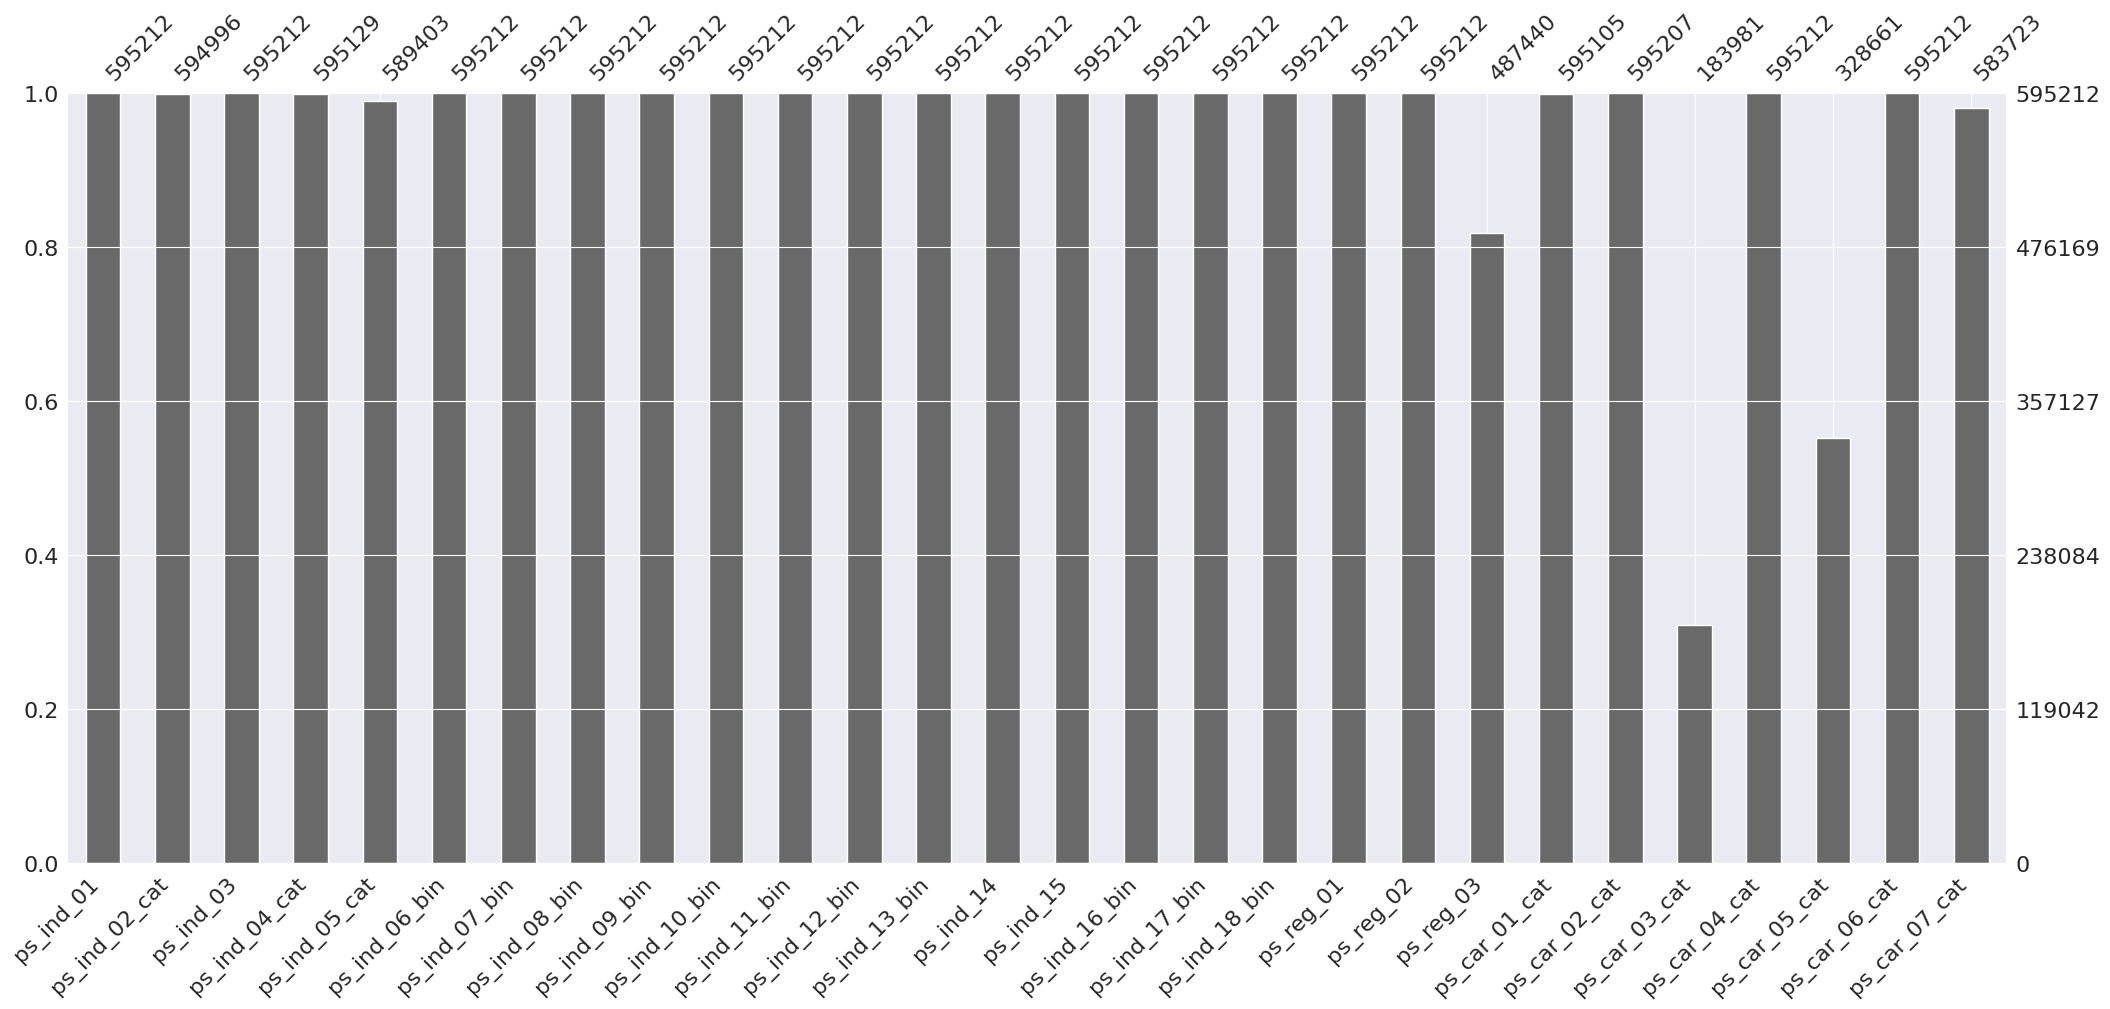

In [8]:
msno.bar(df=data_copy.iloc[:, 1:29])

<Axes: >

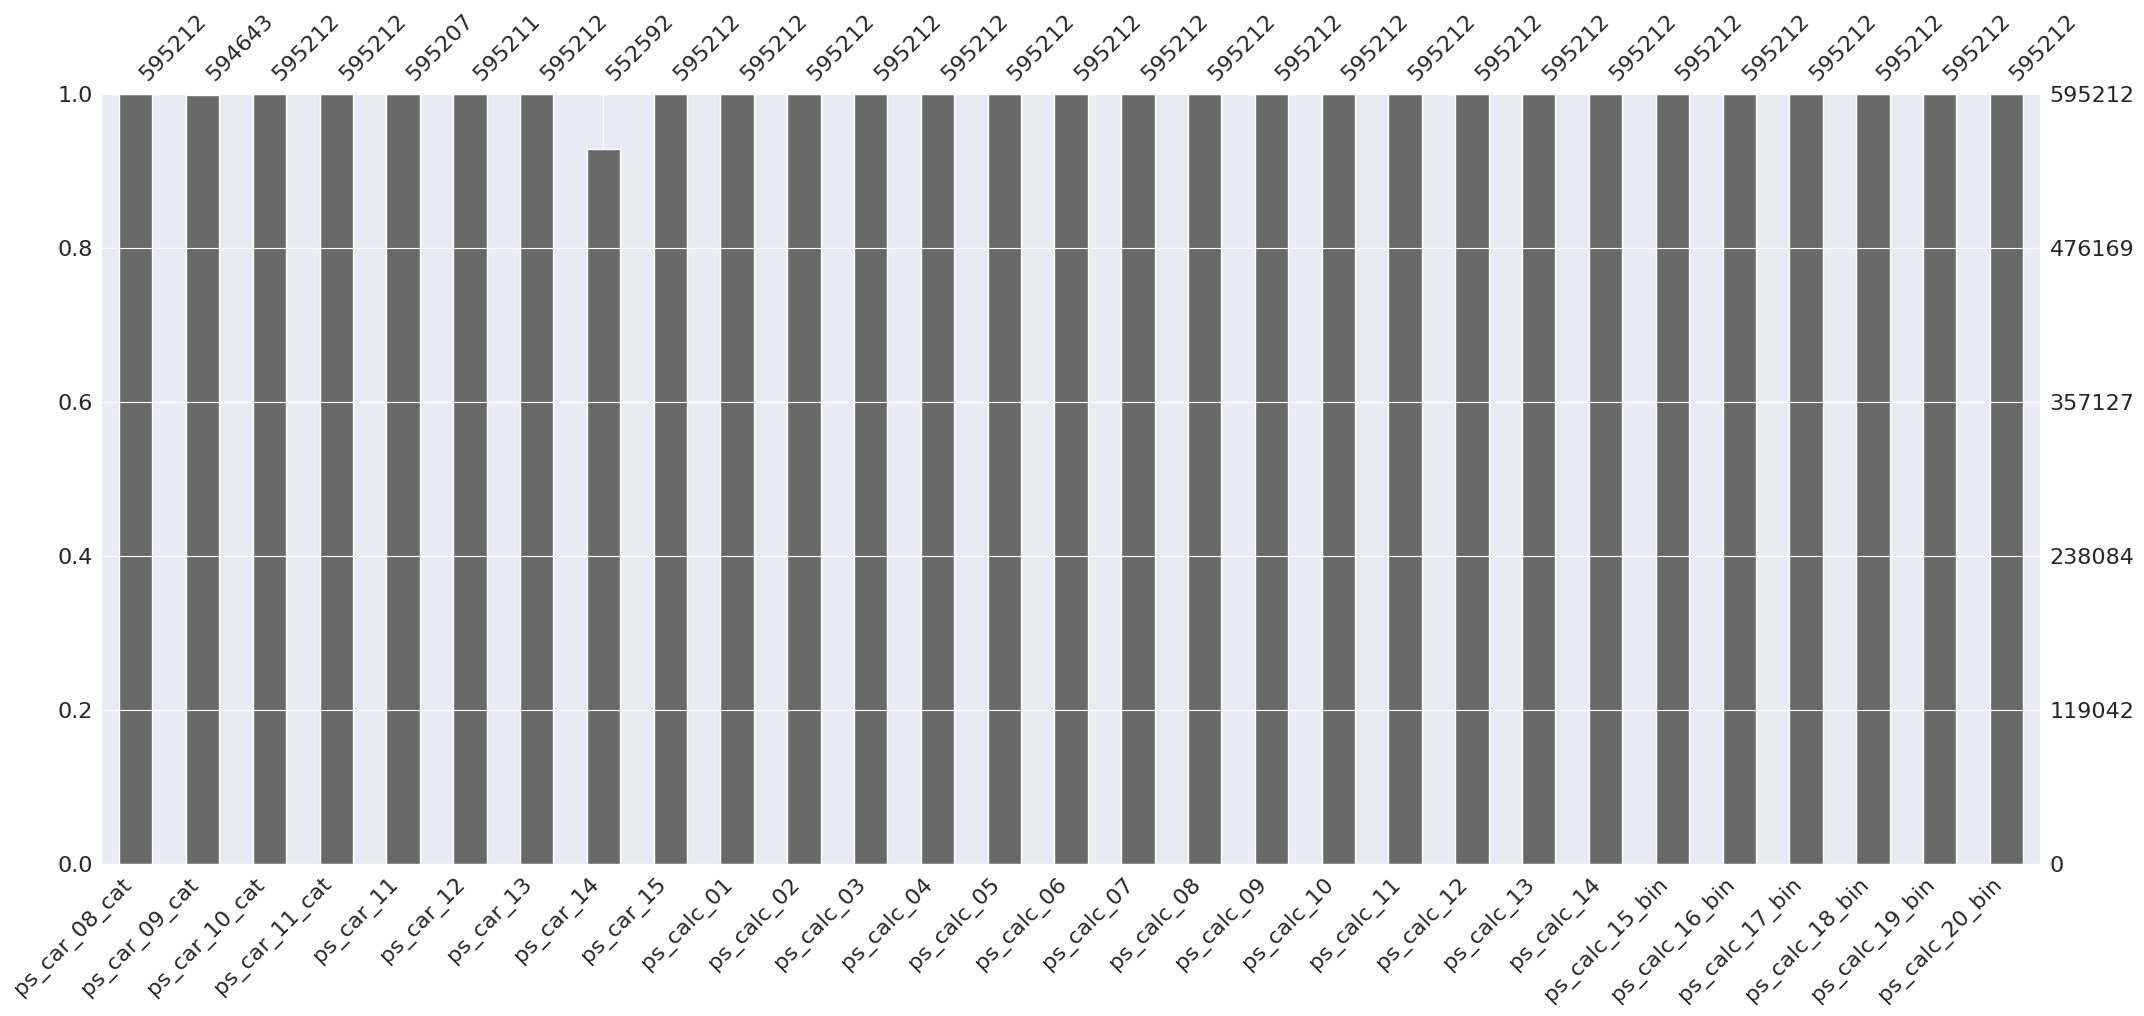

In [9]:
msno.bar(df=data_copy.iloc[:, 29:])

## Wizualizacja danych

In [10]:
data_types = pd.DataFrame(data.dtypes, columns=['dtype'])
data_types['type'] = None
for col in data.columns:
    if 'bin' in col or col == 'target':
        data_types.loc[col, 'type'] = 'binary'
    elif 'cat' in col:
        data_types.loc[col, 'type'] = 'nominal'
    elif data[col].dtype == float:
        data_types.loc[col, 'type'] = 'continuous'
    elif data[col].dtype == int:
        data_types.loc[col, 'type'] = 'ordinal'

<Axes: xlabel='target', ylabel='count'>

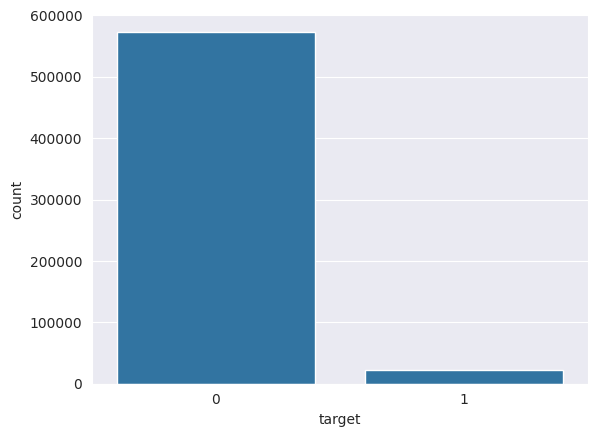

In [11]:
sns.countplot(x='target', data=data)

In [12]:
target_distribution = data.target.value_counts(normalize=True)
target_distribution

target
0    0.963552
1    0.036448
Name: proportion, dtype: float64

Widzimy, że klasy są niezbalansowane. Tylko 3.6% kierowców zgłosiło wniosek o wypłatę odszkodowania. Oznacza to też, że klasyfikator zawsze wybierjący najczęściej występującą klasę osiągnie accuracy aż 96.4%.

## Rozkład atrybutów binarnych

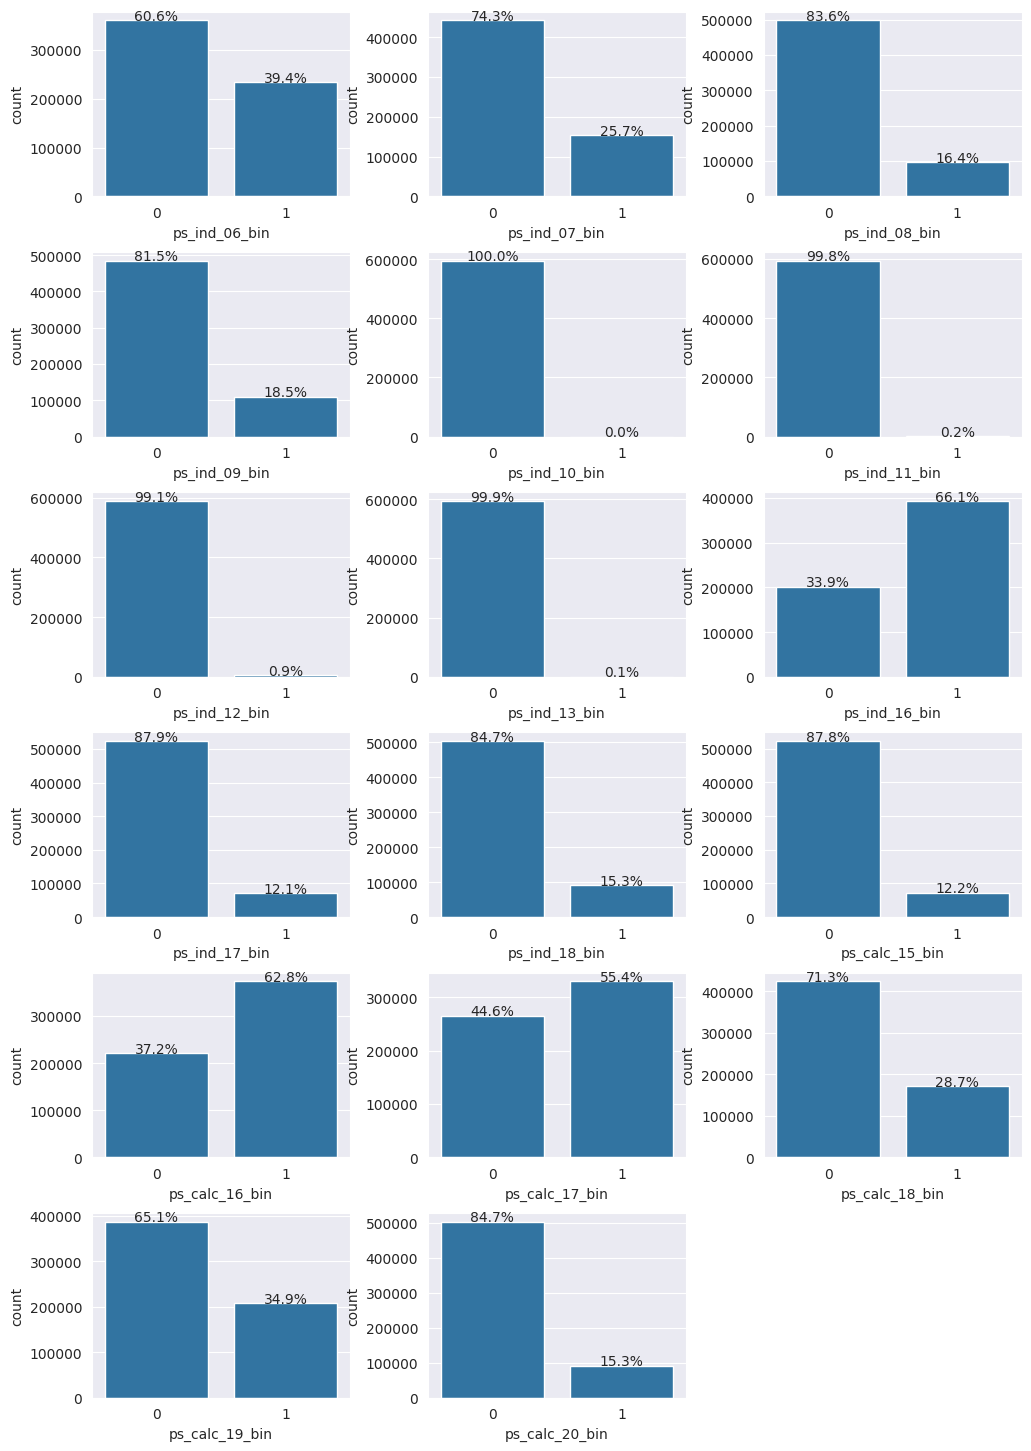

In [13]:
features = data_types[data_types['type'] == 'binary'].index.drop('target')

num_cols = 3
num_rows = 6

plt.figure(figsize=(12, 18))
grid = gridspec.GridSpec(num_rows, num_cols)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    sns.countplot(x=feature, data=data, ax=ax)
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/len(data)*100
        
        ax.text(left_coord + width/2.0,
               height + len(data)*0.001,
               '{:1.1f}%'.format(percent),
               ha='center')

## Rozkład atrybutów nominalnych

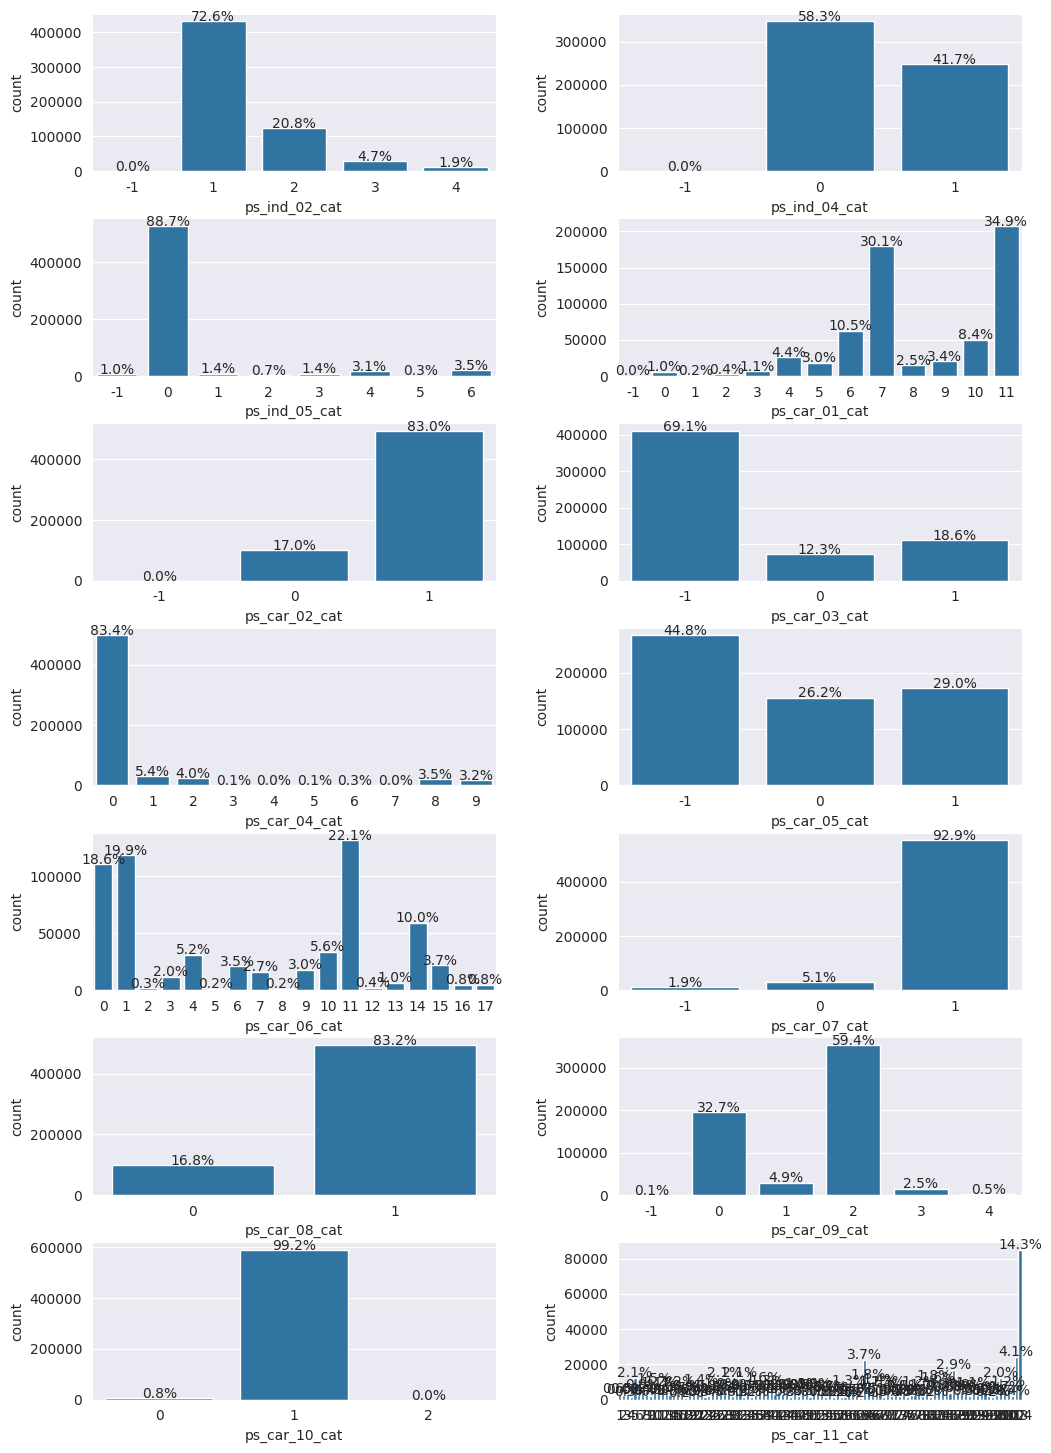

In [14]:
features = data_types[data_types['type'] == 'nominal'].index
num_cols = 2
num_rows = 7

plt.figure(figsize=(12, 18))
grid = gridspec.GridSpec(num_rows, num_cols)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    sns.countplot(x=feature, data=data, ax=ax)
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/len(data)*100
        
        ax.text(left_coord + width/2.0,
               height + len(data)*0.001,
               '{:1.1f}%'.format(percent),
               ha='center')

## Zmienne porządkowe

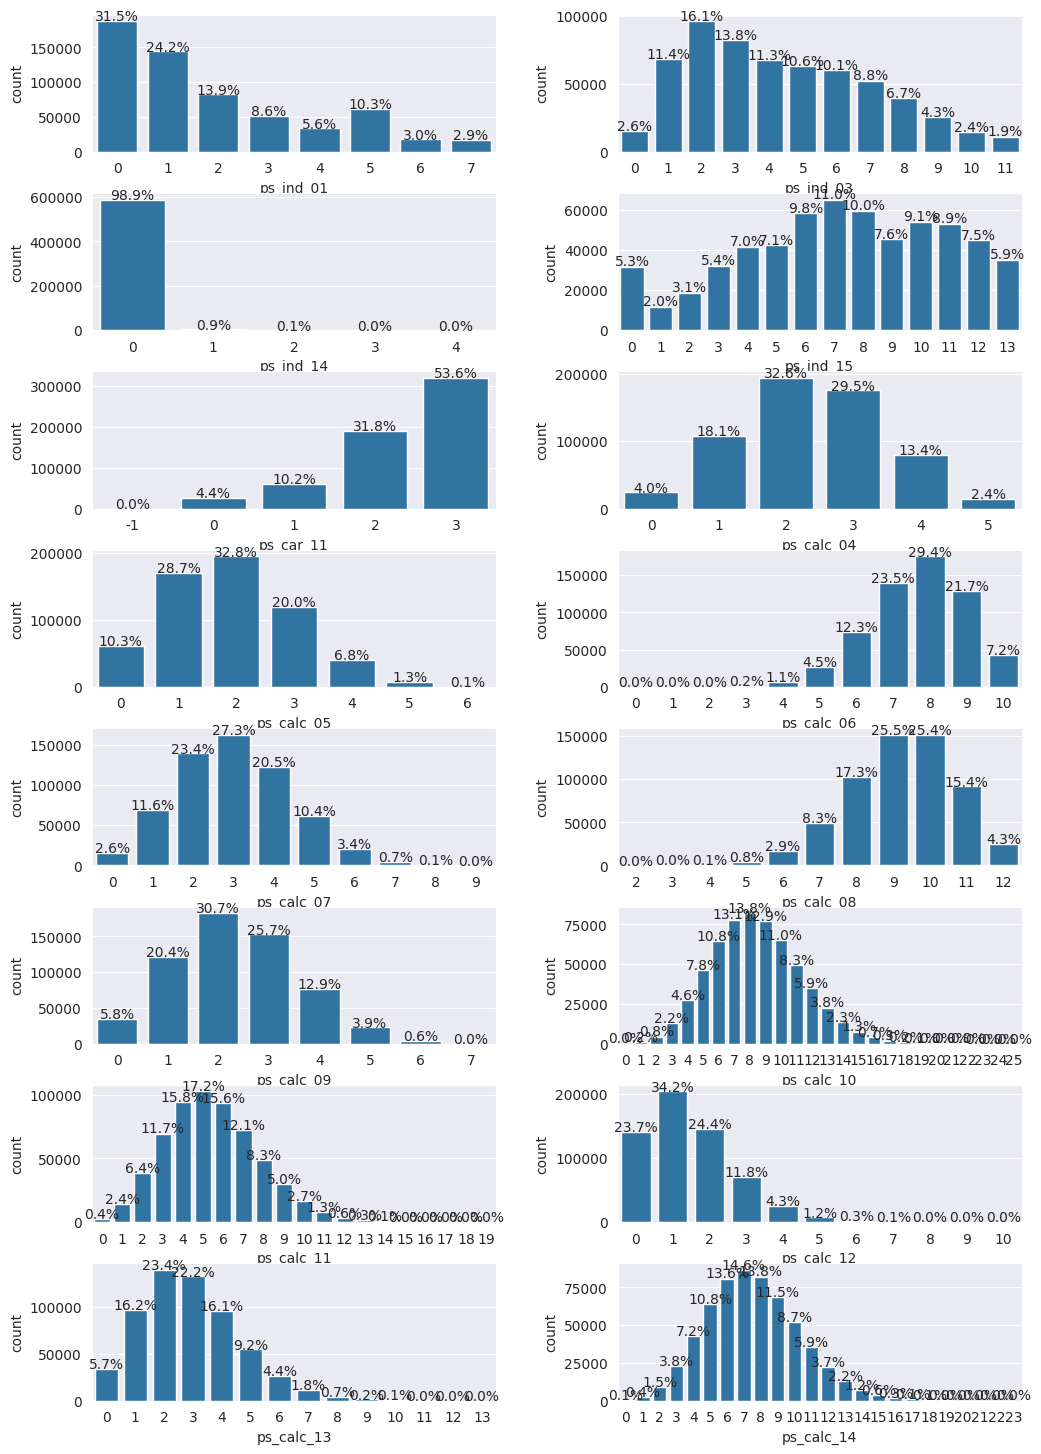

In [15]:
features = data_types[data_types['type'] == 'ordinal'].index
num_cols = 2
num_rows = 8

plt.figure(figsize=(12, 18))
grid = gridspec.GridSpec(num_rows, num_cols)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    sns.countplot(x=feature, data=data, ax=ax)
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/len(data)*100
        
        ax.text(left_coord + width/2.0,
               height + len(data)*0.001,
               '{:1.1f}%'.format(percent),
               ha='center')

## Zmienne ciągłe

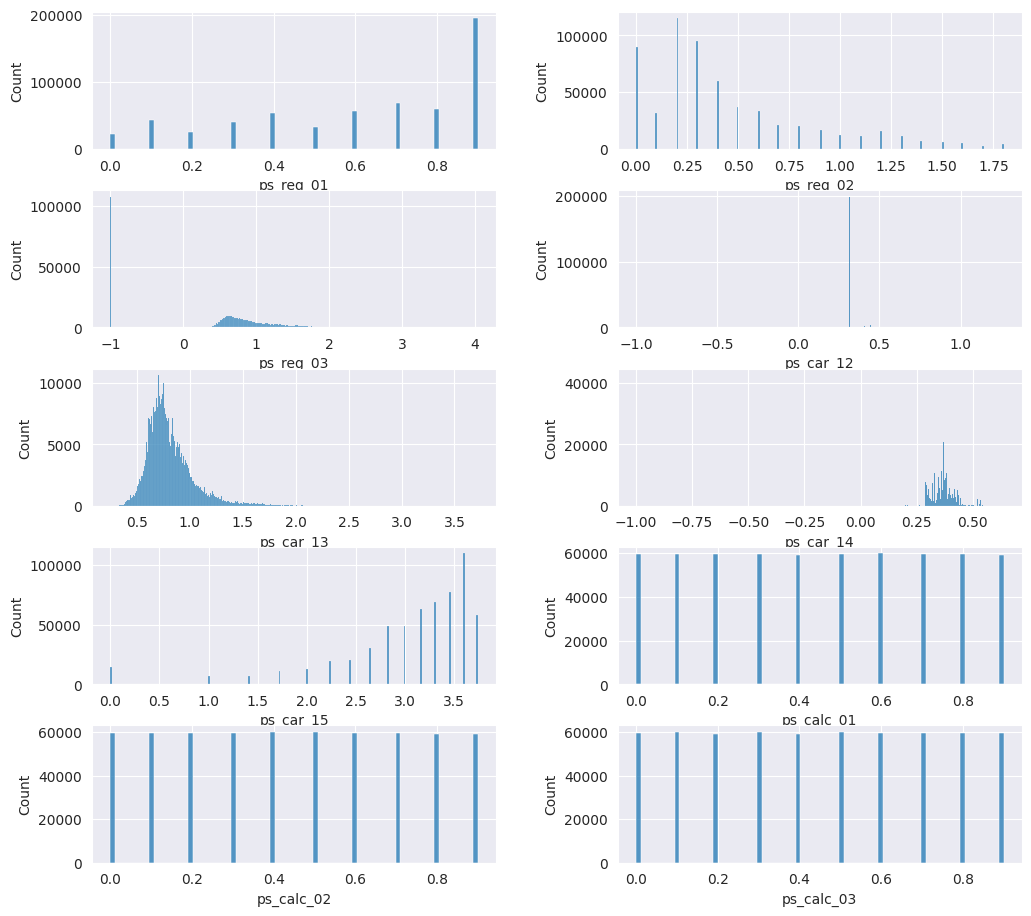

In [17]:
features = data_types[data_types['type'] == 'continuous'].index
num_cols = 2
num_rows = 8

plt.figure(figsize=(12, 18))
grid = gridspec.GridSpec(num_rows, num_cols)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    sns.histplot(x=feature, data=data, ax=ax)


## Wykres korelacji między różnymi atrybutami

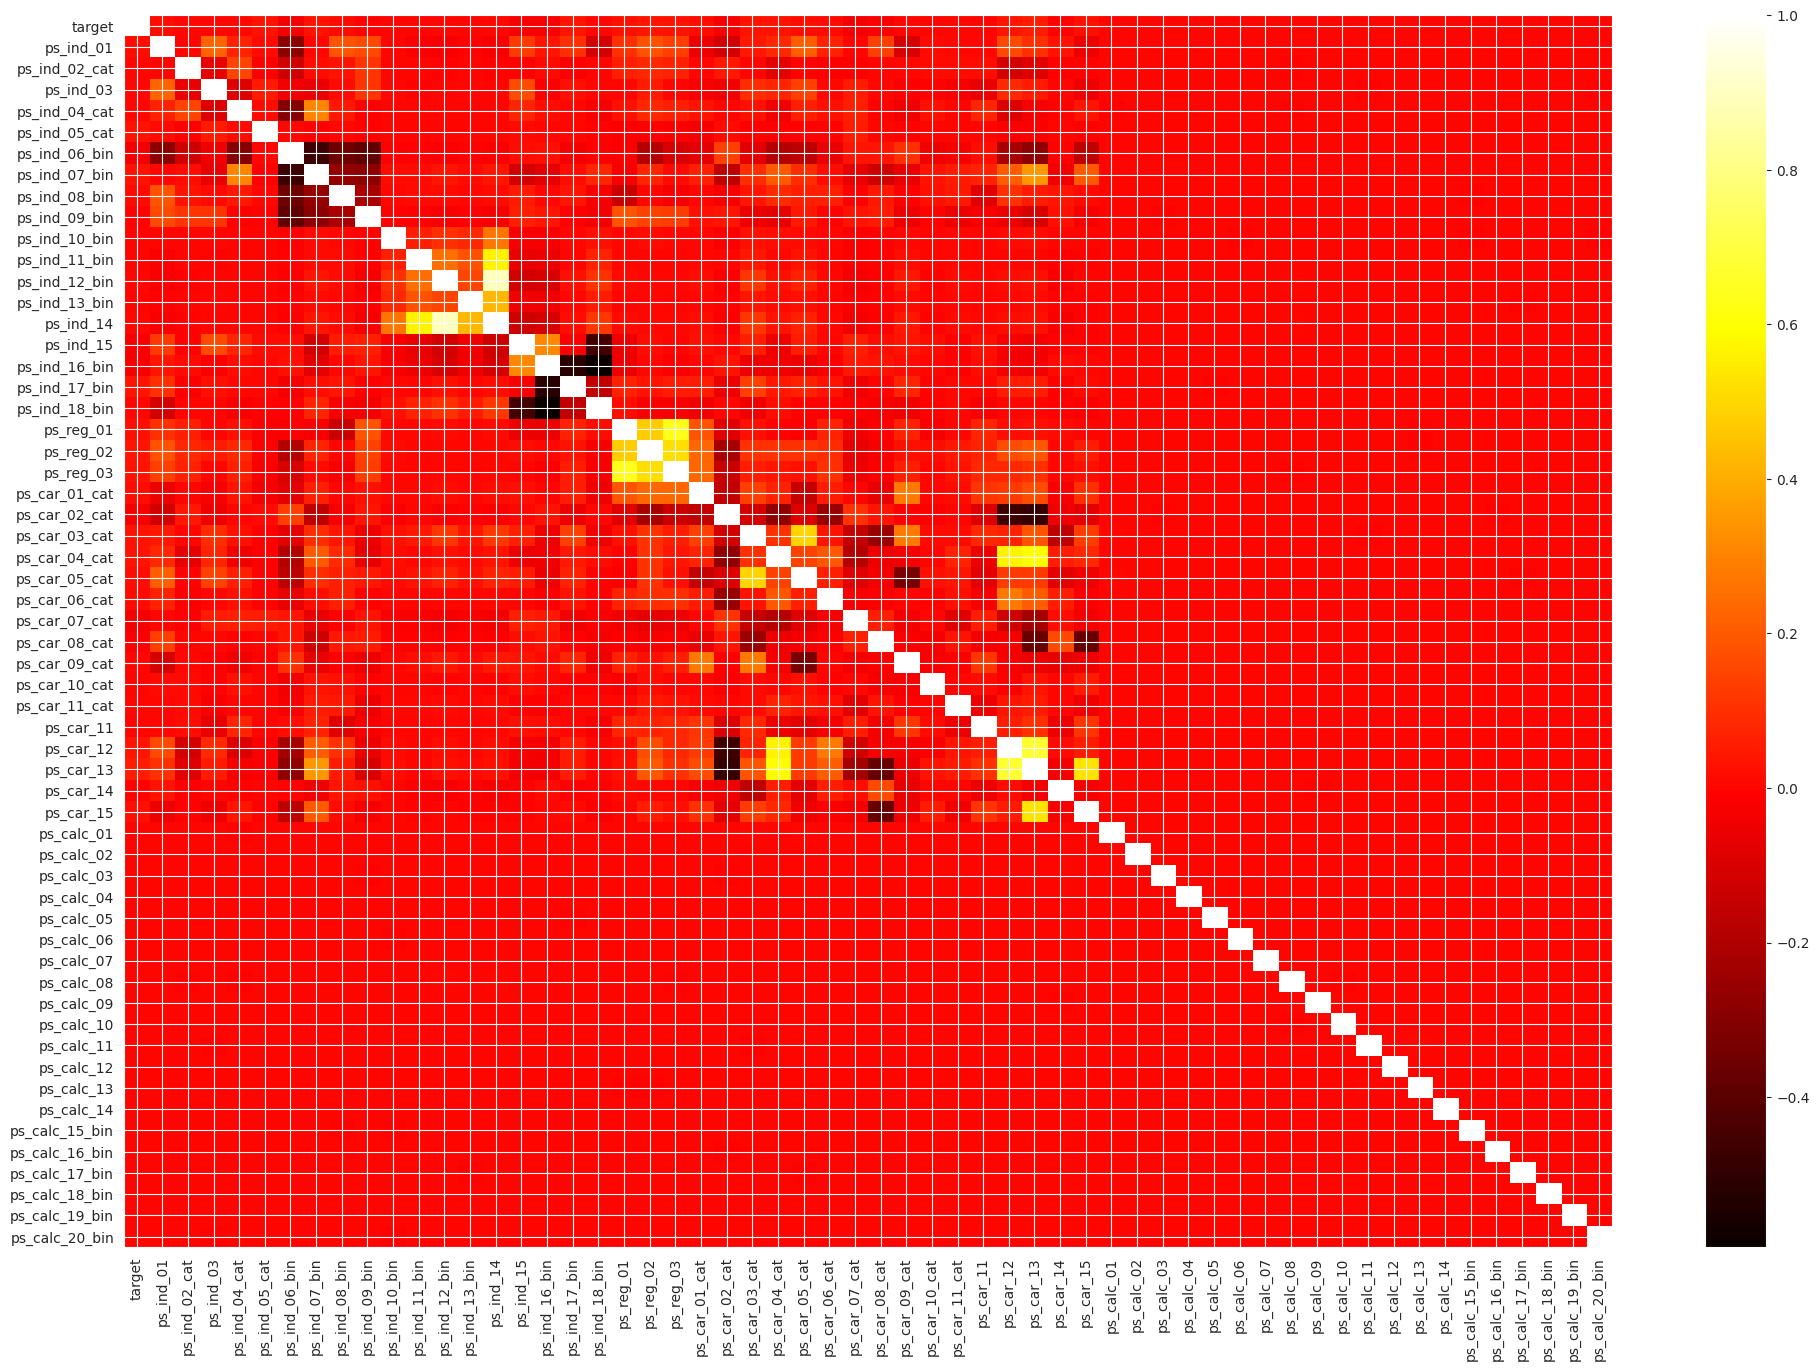

In [19]:
correlation_matrix = data.corr()
plt.figure(figsize=(24, 16))
plt.imshow(correlation_matrix, cmap='hot', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

## Przykład modelu

In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [21]:
target_variable = 'target'

In [22]:
X = data.drop(target_variable, axis=1)
Y = data[target_variable]
X.shape, Y.shape

((595212, 57), (595212,))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [54]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4
}

In [55]:
num_round = 100
model = xgb.train(params, dtrain, num_round)

In [56]:
y_pred = model.predict(dtest)

In [57]:
y_pred_labels = np.array([1 if pred > 0.5 else 0 for pred in y_pred])

In [58]:
accuracy = accuracy_score(y_test, y_pred_labels)
gini_score = 2 * roc_auc_score(y_test, y_pred) - 1
print(f'Accuracy: {accuracy:.2}')
print(f'Gini score: {gini_score:.2}')

Accuracy: 0.96
Gini score: 0.26


In [59]:
cm = confusion_matrix(y_test, y_pred_labels)
cm

array([[114656,      2],
       [  4383,      2]])

In [60]:
tn, fp, fn, tp = cm.ravel()
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("True Positive (TP):", tp)

True Negative (TN): 114656
False Positive (FP): 2
False Negative (FN): 4383
True Positive (TP): 2


Nasz klasyfikator nie osiągnął zbyt dobrych rezultatów. Tylko 2 razy prawidłowo sklasyfikował klasę mniejszościową. Jego accuracy okazało się porównywalne z klasyfikatorem przydzielającym zawsze klasę większościową. W kolejnym etapie projektu postaramy się poprawić ten rezultat poprzez optymalizację hiperparametrów modelu oraz inżynierię atrybutów.  